In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
import math
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Problem3

In [20]:
# Constants
n = 20  # sample size
p_max = 25  # maximum number of features
sigmas = [0.05, 0.3, 0.5, 0.8, 1]  # different values of sigma
beta = np.array([0.5 + 0.5 * j / 25 for j in range(1, p_max+1)])  # coefficients
p_values = np.arange(1, p_max + 1)

In [35]:
# Monte Carlo Simulation
num_simulations = 500
sigma_list = []
p_list = p_values  # Assuming you have a list of p_values
train_mse_average = []  # To store the average train MSE for each p and sigma
test_mse_average = []  # To store the average test MSE for each p and sigma

# For each sigma value
for sigma in sigmas:
    train_mse_sigma = np.zeros(len(p_values))
    test_mse_sigma = np.zeros(len(p_values))
    
    # Run simulations
    for s in range(num_simulations):
        # Generate the data
        X = np.sort(np.random.normal(0, 1, n))
        y = np.zeros(n)
        for j in range(1, 25 + 1):
            beta = 0.5 + 0.5 * (j / 25)
            y += beta * (X ** j)
        e = np.random.normal(0, sigma, n)
        y = y + e

        # Split into training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Iterate over different numbers of features (p)
        for j, p in enumerate(p_values):
            poly = PolynomialFeatures(degree=p)
            x_in_poly = poly.fit_transform(X_train.reshape(-1, 1))[:, 1:]
            x_out_poly = poly.transform(X_test.reshape(-1, 1))[:, 1:]

            # Fit the linear regression
            model = sm.OLS(y_train, x_in_poly).fit()

            # Predict
            y_train_pred = model.predict(x_in_poly)
            y_test_pred = model.predict(x_out_poly)

            # Calculate the MSE and store it
            train_mse_sigma[j] += mean_squared_error(y_train, y_train_pred)
            test_mse_sigma[j] += mean_squared_error(y_test, y_test_pred)

    # Calculate the average MSE over all simulations for the current sigma
    train_mse_sigma /= num_simulations
    test_mse_sigma /= num_simulations
    
    # Store the average MSEs for the current sigma
    train_mse_average.append(train_mse_sigma)
    test_mse_average.append(test_mse_sigma)



In [36]:
# Create a dictionary to store the results
results_dict = {
    'Sigma': [],
    'P': [],
    'Train_MSE_Average': [],
    'Test_MSE_Average': []
}

# Populate the results_dict
for i, sigma in enumerate(sigmas):
    for j, p in enumerate(p_values):
        results_dict['Sigma'].append(sigma)
        results_dict['P'].append(p)
        results_dict['Train_MSE_Average'].append(train_mse_average[i][j])
        results_dict['Test_MSE_Average'].append(test_mse_average[i][j])

# Create a DataFrame from the results_dict
results_df = pd.DataFrame(results_dict)

# Output the DataFrame
print(results_df)


     Sigma   P  Train_MSE_Average  Test_MSE_Average
0     0.05   1       4.145450e+25      2.058015e+28
1     0.05   2       2.747158e+24      2.053252e+28
2     0.05   3       7.272312e+22      2.052634e+28
3     0.05   4       2.226936e+21      2.052574e+28
4     0.05   5       5.061252e+19      2.052512e+28
..     ...  ..                ...               ...
120   1.00  21       2.739121e-02      6.121301e+33
121   1.00  22       2.083501e-02      4.251198e+34
122   1.00  23       2.518155e-02      1.516770e+35
123   1.00  24       3.141472e-02      1.080293e+36
124   1.00  25       4.150860e-02      4.719267e+36

[125 rows x 4 columns]


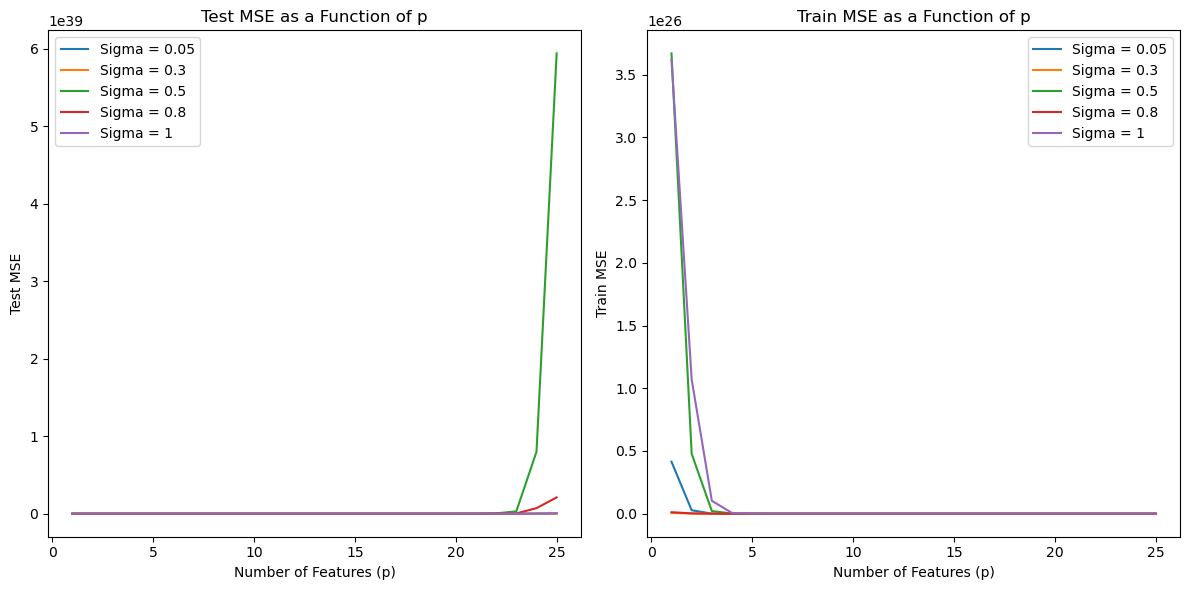

In [38]:
# Select a suitable range of p values (e.g., from 1 to a maximum value)
max_p = 25  
p_values_range = list(range(1, max_p + 1))

# Create subplots for test and train MSE
plt.figure(figsize=(12, 6))

# Plot Test MSE
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
for i, sigma in enumerate(sigmas):
    plt.plot(p_values_range, test_mse_average[i][:max_p], label=f'Sigma = {sigma}')

plt.title('Test MSE as a Function of p')
plt.xlabel('Number of Features (p)')
plt.ylabel('Test MSE')
plt.legend()

# Plot Train MSE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
for i, sigma in enumerate(sigmas):
    plt.plot(p_values_range, train_mse_average[i][:max_p], label=f'Sigma = {sigma}')

plt.title('Train MSE as a Function of p')
plt.xlabel('Number of Features (p)')
plt.ylabel('Train MSE')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [39]:
optimal_p_for_sigma = []

# Iterate through each sigma
for i, sigma in enumerate(sigmas):
    # Find the index of the minimum test MSE for this sigma
    min_mse_index = np.argmin(test_mse_average[i])

    # Get the corresponding p value for the minimum test MSE
    optimal_p = p_values[min_mse_index]

    # Store the optimal p value for this sigma
    optimal_p_for_sigma.append(optimal_p)

# Print or display the optimal p values for each sigma
for i, sigma in enumerate(sigmas):
    print(f"Optimal p for σ={sigma}: {optimal_p_for_sigma[i]}")


Optimal p for σ=0.05: 15
Optimal p for σ=0.3: 12
Optimal p for σ=0.5: 11
Optimal p for σ=0.8: 11
Optimal p for σ=1: 10


In [ ]:
#Explain the relationship.
#1. As we increase the complexity of model, the training MSE goes down. However, the test MSE is more like a U shape, this 
#is because the the variance will go up as the model complexity increases.
#2. When σ is relatively low (indicating low noise or error in your data), the optimal p tends to be higher. 
#This is because the model can capture more complex patterns in the data without being penalized by excessive noise. 
#A higher-degree polynomial (higher p) can better fit the underlying signal in the data, leading to lower test MSE.

In [26]:
#problem4

In [ ]:
#a

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
# Setting the seed for reproducibility
np.random.seed(50)

In [38]:
# Generate synthetic data
n = 100  # Number of data points
x = np.random.normal(0, 1, n)  # Independent N(0, 1) random variables
epsilon = np.random.normal(0, 1, n)  # Independent N(0, 1) random variables
y = x - 2 * x**2 + epsilon

# Models to evaluate (Polynomial degrees)
degrees = [1, 2, 3, 4]
loocv_errors = []

# Leave-One-Out Cross-Validation
for degree in degrees:
    mse_sum = 0
    for i in range(n):
        x_train = np.delete(x, i)  # Leave one data point out
        y_train = np.delete(y, i)
        
        x_val = x[i:i+1]  # Validation data point
        y_val = y[i:i+1]
        
        # Fit polynomial regression model
        poly_features = PolynomialFeatures(degree=degree)
        x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
        x_val_poly = poly_features.transform(x_val.reshape(-1, 1))
        
        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        
        # Predict and calculate MSE for the validation point
        y_pred = model.predict(x_val_poly)
        mse = mean_squared_error(y_val, y_pred)
        
        mse_sum += mse
    
    # Calculate the average MSE for the current model
    avg_mse = mse_sum / n
    loocv_errors.append(avg_mse)

# Print LOOCV errors for each model
for degree, error in zip(degrees, loocv_errors):
    print(f"Model with Degree {degree}: LOOCV Error = {error:.4f}")


Model with Degree 1: LOOCV Error = 24.6109
Model with Degree 2: LOOCV Error = 1.0612
Model with Degree 3: LOOCV Error = 1.1229
Model with Degree 4: LOOCV Error = 1.1421


In [39]:
#Therefore model with degree2 is what we should choose, because it has the smallest validation error(LOOCV).

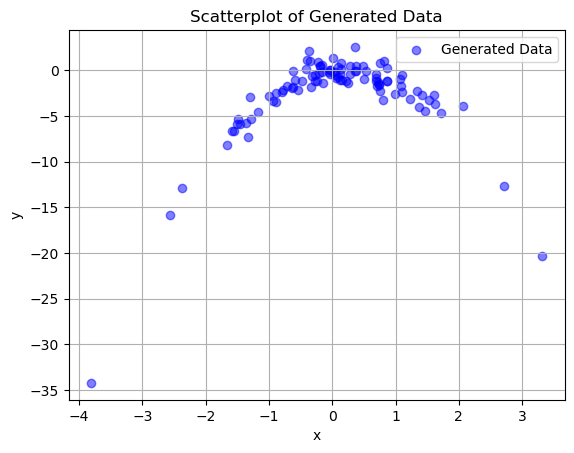

In [40]:
import matplotlib.pyplot as plt

# Create a scatterplot of the generated data
plt.scatter(x, y, label='Generated Data', color='b', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of Generated Data')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


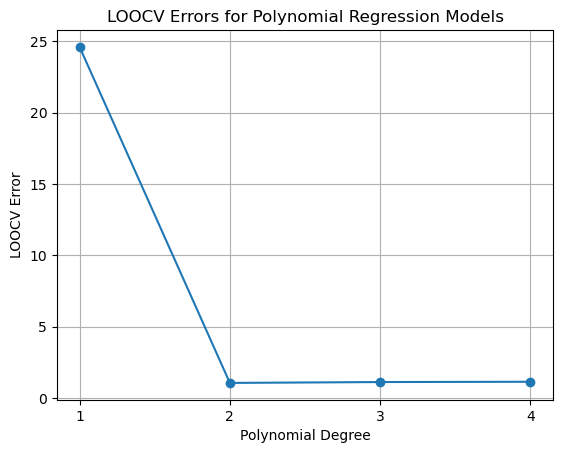

In [41]:
# LOOCV errors for each model 
degrees = [1, 2, 3, 4]
# Create a plot of LOOCV errors
plt.plot(degrees, loocv_errors, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('LOOCV Error')
plt.title('LOOCV Errors for Polynomial Regression Models')
plt.xticks(degrees)
plt.grid(True)

# Show the plot
plt.show()


In [33]:
#b

In [42]:
# Setting a different seed 
np.random.seed(70)
# Generate synthetic data
n = 100  # Number of data points
x = np.random.normal(0, 1, n)  # Independent N(0, 1) random variables
epsilon = np.random.normal(0, 1, n)  # Independent N(0, 1) random variables
y = x - 2 * x**2 + epsilon

# Models to evaluate (Polynomial degrees)
degrees = [1, 2, 3, 4]
loocv_errors = []

# Leave-One-Out Cross-Validation
for degree in degrees:
    mse_sum = 0
    for i in range(n):
        x_train = np.delete(x, i)  # Leave one data point out
        y_train = np.delete(y, i)
        
        x_val = x[i:i+1]  # Validation data point
        y_val = y[i:i+1]
        
        # Fit polynomial regression model
        poly_features = PolynomialFeatures(degree=degree)
        x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
        x_val_poly = poly_features.transform(x_val.reshape(-1, 1))
        
        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        
        # Predict and calculate MSE for the validation point
        y_pred = model.predict(x_val_poly)
        mse = mean_squared_error(y_val, y_pred)
        
        mse_sum += mse
    
    # Calculate the average MSE for the current model
    avg_mse = mse_sum / n
    loocv_errors.append(avg_mse)

# Print LOOCV errors for each model
for degree, error in zip(degrees, loocv_errors):
    print(f"Model with Degree {degree}: LOOCV Error = {error:.4f}")



Model with Degree 1: LOOCV Error = 16.4374
Model with Degree 2: LOOCV Error = 1.2015
Model with Degree 3: LOOCV Error = 1.2589
Model with Degree 4: LOOCV Error = 1.5552


In [43]:
# The results of error is different from before, but the magnitude level of errors and its final conclusion is 
#still the same: The model with degree 2 has the smallest validation error.

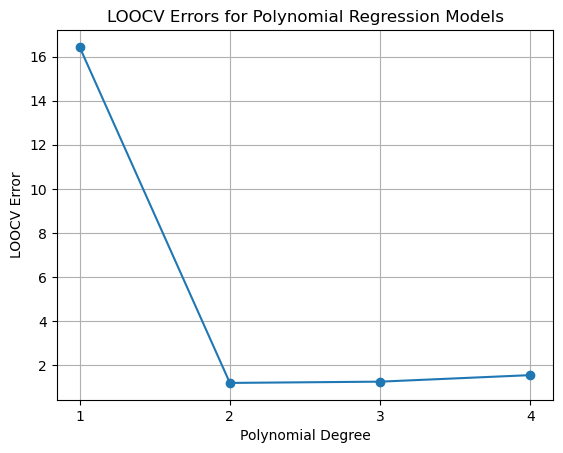

In [44]:
# LOOCV errors for each model 
degrees = [1, 2, 3, 4]
# Create a plot of LOOCV errors
plt.plot(degrees, loocv_errors, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('LOOCV Error')
plt.title('LOOCV Errors for Polynomial Regression Models')
plt.xticks(degrees)
plt.grid(True)

# Show the plot
plt.show()



In [36]:
#c

In [45]:
#The model with degree2 is what we should choose, because it has the smallest validation error(LOOCV). This is what we 
#expected, because the data generation process shows that the true relationship between y and x is polynomial(degree =2).
#Therefore, as we increase the degree, the validation error should decrease first, but when the complexity of model
#keeps increasing, the validation error would increase. This is because validation error is estimation of testing errors,
#which includes not only the bias but also the variance, and this leads to the u-shape of our validation error. 

In [46]:
#d

In [50]:
# Model degrees (as previously done)
degrees = [1, 2, 3, 4]

# Initialize lists to store coefficient p-values for each model
coeff_p_values = []

# Fit polynomial regression models and calculate coefficient p-values
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x.reshape(-1, 1))

    # Add a constant column to the feature matrix (for the intercept term)
    x_poly = sm.add_constant(x_poly)

    # Fit the linear regression model
    model = sm.OLS(y, x_poly).fit()

    # Get coefficient p-values
    p_values = model.pvalues[1:]  # Here we exclude the constant term
    coeff_p_values.append(p_values)

# Print the results
for i, degree in enumerate(degrees):
    print(f"Model with Degree {degree}:")
    for j, p_value in enumerate(coeff_p_values[i]):
        print(f"Coefficient x^ {j+1}: p-value = {p_value:.4f}")
    print()


Model with Degree 1:
Coefficient x^ 1: p-value = 0.0001

Model with Degree 2:
Coefficient x^ 1: p-value = 0.0000
Coefficient x^ 2: p-value = 0.0000

Model with Degree 3:
Coefficient x^ 1: p-value = 0.0000
Coefficient x^ 2: p-value = 0.0000
Coefficient x^ 3: p-value = 0.6005

Model with Degree 4:
Coefficient x^ 1: p-value = 0.0000
Coefficient x^ 2: p-value = 0.0000
Coefficient x^ 3: p-value = 0.5991
Coefficient x^ 4: p-value = 0.6689



In [ ]:
# In each model, the x^1 and x^2 are both significant. And this is consistant with our previous conclusion that the 
#model with degree 2 is the best. Also this is consistant with our data generation process where we only use x^1 and x^2 
#to generate the y and x. 